In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from sklearn.utils import resample
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV

In [ ]:
df = pd.read_csv('dataset_a.csv')
df.head()

,ID,subject,race,age,x_0,y_0,x_1,y_1,x_2,y_2,x_3,y_3,x_4,y_4,x_5,y_5,x_6,y_6,x_7,y_7,x_8,y_8,x_9,y_9,x_10,y_10,x_11,y_11,x_12,y_12,x_13,y_13,x_14,y_14,x_15,y_15,x_16,y_16,x_17,y_17,...,y_48,x_49,y_49,x_50,y_50,x_51,y_51,x_52,y_52,x_53,y_53,x_54,y_54,x_55,y_55,x_56,y_56,x_57,y_57,x_58,y_58,x_59,y_59,x_60,y_60,x_61,y_61,x_62,y_62,x_63,y_63,x_64,y_64,x_65,y_65,x_66,y_66,x_67,y_67,Label
0,64,6,-1,0,0.0,0.376222,0.022801,0.493485,0.047231,0.600977,0.086319,0.703583,0.153094,0.785016,0.254072,0.835505,0.377850,0.864821,0.493485,0.889251,0.609121,0.897394,0.714984,0.884365,0.807818,0.845277,0.890879,0.791531,0.942997,0.721498,0.972313,0.635179,0.985342,0.545603,0.998371,0.452769,1.0,0.363192,0.153094,0.133551,...,0.591205,0.513029,0.496743,0.586319,0.452769,0.628665,0.462541,0.664495,0.456026,0.719870,0.500000,0.749186,0.597720,0.714984,0.641694,0.661238,0.651466,0.622150,0.651466,0.579805,0.649837,0.511401,0.633550,0.482085,0.581433,0.583062,0.496743,0.623779,0.496743,0.659609,0.501629,0.719870,0.583062,0.661238,0.607492,0.623779,0.609121,0.583062,0.605863,1
1,65,6,-1,0,0.0,0.167085,0.008794,0.293970,0.018844,0.414573,0.031407,0.532663,0.076633,0.633166,0.155779,0.711055,0.257538,0.770100,0.358040,0.829146,0.472362,0.854271,0.581658,0.845477,0.682161,0.798995,0.788945,0.752513,0.865578,0.682161,0.913317,0.592965,0.942211,0.491206,0.972362,0.388191,1.0,0.281407,0.110553,0.074121,...,0.604271,0.423367,0.557789,0.487437,0.533920,0.523869,0.548995,0.562814,0.545226,0.611809,0.582915,0.658291,0.641960,0.600502,0.660804,0.548995,0.663317,0.510050,0.660804,0.471106,0.653266,0.413317,0.635678,0.388191,0.597990,0.481156,0.574121,0.517588,0.582915,0.556533,0.585427,0.626884,0.630653,0.555276,0.608040,0.517588,0.604271,0.481156,0.596734,1
2,66,6,-1,0,0.0,0.317910,0.010448,0.431343,0.022388,0.537313,0.047761,0.638806,0.098507,0.726866,0.189552,0.783582,0.310448,0.811940,0.428358,0.841791,0.552239,0.853731,0.665672,0.849254,0.768657,0.828358,0.864179,0.794030,0.922388,0.732836,0.955224,0.649254,0.971642,0.564179,0.988060,0.479104,1.0,0.394030,0.150746,0.104478,...,0.570149,0.489552,0.494030,0.559702,0.455224,0.598507,0.467164,0.637313,0.461194,0.688060,0.507463,0.723881,0.597015,0.677612,0.604478,0.625373,0.600000,0.586567,0.597015,0.546269,0.594030,0.482090,0.589552,0.446269,0.559702,0.553731,0.505970,0.592537,0.507463,0.631343,0.511940,0.694030,0.577612,0.631343,0.558209,0.592537,0.553731,0.553731,0.550746,1
3,67,6,-1,1,0.0,0.223947,0.006652,0.343681,0.022173,0.458980,0.037694,0.567627,0.070953,0.669623,0.135255,0.749446,0.230599,0.804878,0.330377,0.849224,0.439024,0.869180,0.545455,0.862528,0.651885,0.835920,0.762749,0.798226,0.847007,0.738359,0.904656,0.651885,0.940133,0.554324,0.971175,0.450111,1.0,0.339246,0.115299,0.079823,...,0.585366,0.385809,0.525499,0.447894,0.496674,0.481153,0.509978,0.523282,0.507760,0.574279,0.547672,0.616408,0.616408,0.560976,0.643015,0.507760,0.651885,0.465632,0.649667,0.427938,0.643015,0.372506,0.625277,0.350333,0.580931,0.441242,0.536585,0.476718,0.543237,0.516630,0.547672,0.585366,0.605322,0.514412,0.600887,0.472284,0.600887,0.436807,0.594235,1
4,68,6,-1,1,0.0,0.249453,0.017505,0.363239,0.035011,0.466083,0.048140,0.568928,0.083151,0.663020,0.148796,0.728665,0.240700,0.776805,0.339168,0.814004,0.446390,0.827133,0.560175,0.809628,0.667396,0.776805,0.774617,0.739606,0.855580,0.678337,0.905908,0.584245,0.938731,0.477024,0.969365,0.365427,1.0,0.242888,0.048140,0.126915,...,0.553611,0.339168,0.474836,0.393873,0.437637,0.439825,0.444201,0.483589,0.435449,0.547046,0.466083,0.606127,0.540481,0.549234,0.579869,0.487965,0.595186,0.439825,0.599562,0.393873,0.599562,0.341357,0.590810,0.332604,0.542670,0.396061,0.474836,0.439825,0.472648,0.483589,0.470460,0.575492,0.531729,0.483589,0.551422,0.439825,0.555799,0.393873,0.555799,1


In [ ]:
df.corr()

,ID,subject,race,age,x_0,y_0,x_1,y_1,x_2,y_2,x_3,y_3,x_4,y_4,x_5,y_5,x_6,y_6,x_7,y_7,x_8,y_8,x_9,y_9,x_10,y_10,x_11,y_11,x_12,y_12,x_13,y_13,x_14,y_14,x_15,y_15,x_16,y_16,x_17,y_17,...,y_48,x_49,y_49,x_50,y_50,x_51,y_51,x_52,y_52,x_53,y_53,x_54,y_54,x_55,y_55,x_56,y_56,x_57,y_57,x_58,y_58,x_59,y_59,x_60,y_60,x_61,y_61,x_62,y_62,x_63,y_63,x_64,y_64,x_65,y_65,x_66,y_66,x_67,y_67,Label
ID,1.000000,0.964446,0.430418,0.062484,0.078273,-0.016062,0.069038,-0.013713,0.028260,0.000497,0.037034,0.014199,0.069989,0.017239,0.095139,0.015000,0.086976,0.027501,0.071415,0.047071,0.052246,0.047873,0.032102,0.023956,0.010854,-0.023436,-0.010507,-0.056873,0.004532,-0.063435,0.023373,-0.065071,0.008282,-0.070538,-0.081543,-0.072429,-0.134026,-0.062223,0.090695,-0.000606,...,-0.050312,0.008230,0.059513,0.038287,0.105929,0.050504,0.098808,0.062166,0.097181,0.091111,0.037512,0.130912,-0.077013,0.096686,0.069947,0.066880,0.140789,0.052783,0.154647,0.037440,0.149605,0.006139,0.089630,-0.047131,-0.015863,0.039056,0.066088,0.051635,0.068776,0.063736,0.058611,0.138356,-0.040661,0.066514,0.171792,0.052530,0.182897,0.038044,0.177327,-0.749985
subject,0.964446,1.000000,0.501955,0.095122,0.062200,-0.010752,0.044095,-0.007525,0.011428,0.007087,0.022491,0.022266,0.054520,0.028251,0.079775,0.030242,0.074641,0.043828,0.064193,0.060863,0.050918,0.061376,0.036339,0.038530,0.019431,-0.006110,-0.000940,-0.040237,0.011439,-0.050569,0.025948,-0.053955,0.011288,-0.059393,-0.073276,-0.060753,-0.128850,-0.050397,0.084796,-0.013540,...,-0.026934,0.008399,0.058470,0.038552,0.092743,0.052609,0.087200,0.066009,0.084576,0.094625,0.037106,0.130959,-0.052410,0.098444,0.078604,0.069143,0.140416,0.054210,0.153276,0.037447,0.148870,0.006946,0.096925,-0.043512,0.003294,0.039384,0.070265,0.053634,0.071574,0.067229,0.063020,0.136834,-0.019855,0.069221,0.160541,0.054144,0.170540,0.038407,0.165444,-0.586243
race,0.430418,0.501955,1.000000,-0.112269,-0.023829,0.003194,-0.067589,0.010080,-0.062381,0.025657,-0.037466,0.037482,-0.004819,0.036552,0.013634,0.026187,0.018943,0.012017,0.015597,-0.003160,0.011005,-0.002960,0.005086,-0.001790,-0.003531,0.006984,-0.013279,0.016670,-0.002925,0.029858,0.021707,0.040301,0.046762,0.042012,0.042521,0.039411,0.014302,0.041745,0.052649,-0.029075,...,0.073473,0.026625,0.031308,0.038818,-0.003629,0.038272,-0.002279,0.037241,-0.001394,0.041482,0.040541,0.033642,0.090801,0.033249,0.113739,0.028412,0.113370,0.029503,0.110160,0.028192,0.109436,0.020085,0.103345,0.019248,0.069782,0.038537,0.052216,0.037170,0.049574,0.035549,0.056742,0.028633,0.088772,0.031742,0.077335,0.033411,0.074626,0.033490,0.072722,-0.032740
age,0.062484,0.095122,-0.112269,1.000000,-0.054065,0.026354,-0.119636,0.056928,-0.062307,0.095429,-0.038598,0.144537,-0.047196,0.217450,-0.063570,0.335002,-0.078198,0.460752,-0.041093,0.543280,0.023770,0.548339,0.089177,0.525459,0.129245,0.430429,0.118536,0.289618,0.093372,0.158672,0.060501,0.074380,0.037263,0.016591,-0.016777,-0.026739,-0.121544,-0.061592,-0.122526,-0.017792,...,0.249723,-0.105795,0.346823,-0.069421,0.403646,-0.018042,0.412182,0.031535,0.391263,0.077739,0.310270,0.138228,0.190600,0.089837,0.277412,0.048459,0.308847,-0.000916,0.324271,-0.050140,0.324284,-0.090875,0.312692,-0.137540,0.299403,-0.066420,0.416959,-0.013849,0.425642,0.037410,0.404523,0.128419,0.246155,0.041653,0.281701,-0.008906,0.300891,-0.058157,0.293038,-0.011592
x_0,0.078273,0.062200,-0.023829,-0.054065,1.000000,-0.117554,0.467331,-0.166268,-0.052639,-0.199549,-0.211279,-0.223458,-0.283215,-0.230134,-0.336897,-0.202170,-0.389459,-0.143577,-0.433055,-0.064792,-0.466924,0.038188,-0.494807,0.149645,-0.516088,0.260725,-0.529220,0.362191,-0.524057,0.439724,-0.499159,0.481902,-0.474432,0.498133,-0.387921,0.494975,-0.095030,0.488388,0.256347,-0.138978,...,-0.073136,-0.320406,0.023334,-0.319904,0.118524,-0.342191,0.165937,-0.349575,0.227623,-0.375205,0.298937,-0.413939,0.326026,-0.419680,0.267356,-0.412932,0.180706,-0.404987,0.120498,-0.388414,0.065410,-0.367815,-0.013731,-0.

In [ ]:
df.describe()

,ID,subject,race,age,x_0,y_0,x_1,y_1,x_2,y_2,x_3,y_3,x_4,y_4,x_5,y_5,x_6,y_6,x_7,y_7,x_8,y_8,x_9,y_9,x_10,y_10,x_11,y_11,x_12,y_12,x_13,y_13,x_14,y_14,x_15,y_15,x_16,y_16,x_17,y_17,...,y_48,x_49,y_49,x_50,y_50,x_51,y_51,x_52,y_52,x_53,y_53,x_54,y_54,x_55,y_55,x_56,y_56,x_57,y_57,x_58,y_58,x_59,y_59,x_60,y_60,x_61,y_61,x_62,y_62,x_63,y_63,x_64,y_64,x_65,y_65,x_66,y_66,x_67,y_67,Label
count,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,...,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000,2406.000000
mean,1446.056525,659.492519,-0.707398,3.213633,0.005107,0.183200,0.016909,0.308935,0.036152,0.431052,0.062605,0.550201,0.111718,0.659018,0.190370,0.749104,0.288641,0.820889,0.392199,0.880022,0.504347,0.898096,0.615851,0.878450,0.717748,0.818095,0.814118,0.745475,0.890896,0.654692,0.938181,0.545538,0.963003,0.426512,0.980381,0.304746,0.990804,0.179550,0.090585,0.103362,...,0.606053,0.390334,0.577406,0.457461,0.559276,0.502308,0.569822,0.547284,0.558707,0.613850,0.576025,0.683829,0.603318,0.616367,0.662087,0.551631,0.687744,0.503061,0.692733,0.454580,0.688532,0.388890,0.664094,0.349699,0.608362,0.456980,0.598576,0.502452,0.602862,0.548032,0.597969,0.653999,0.605928,0.548960,0.629703,0.502745,0.635120,0.456579,0.630368,0.251455
std,831.287882,606.305234,0.586050,2.252298,0.016820,0.092665,0.015862,0.086842,0.027106,0.081437,0.040728,0.076853,0.054784,0.072216,0.068412,0.068359,0.081550,0.067737,0.093331,0.067860,0.097303,0.067016,0.092613,0.067345,0.080359,0.067070,0.067028,0.067665,0.053753,0.071032,0.040681,0.074849,0.028521,0.078557,0.020762,0.082863,0.024751,0.087751,0.058937,0.066094,...,0.055905,0.081316,0.051496,0.086097,0.051857,0.086776,0.052512,0.085120,0.051674,0.079904,0.051279,0.074695,0.056305,0.084206,0.054350,0.090913,0.057366,0.091926,0.057915,0.091500,0.057538,0.085216,0.054671,0.076532,0.053285,0.086838,0.053523,0.087484,0.053743,0.086037,0.053192,0.075636,0.053540,0.087522,0.052193,0.088656,0.052808,0.088229,0.052399,0.433940
min,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.098940,0.000000,0.194346,0.000000,0.296820,0.000000,0.402827,0.000000,0.512367,0.020305,0.589552,0.055838,0.664260,0.126904,0.678700,0.238579,0.670945,0.385787,0.616740,0.516246,0.524229,0.617328,0.427313,0.700361,0.334802,0.776173,0.222672,0.790932,0.112167,0.743073,0.000000,0.000000,0.000000,...,0.444043,0.121150,0.430047,0.165939,0.379569,0.193370,0.385192,0.226519,0.374883,0.305249,0.415544,0.385159,0.458150,0.293286,0.503247,0.215548,0.516234,0.166078,0.529412,0.123675,0.532164,0.095406,0.500000,0.102473,0.462094,0.159011,0.431115,0.193370,0.427366,0.226519,0.427366,0.356890,0.465909,0.218232,0.478756,0.183746,0.483938,0.148410,0.484974,0.000000
25%,724.250000,107.250000,-1.000000,1.000000,0.000000,0.121622,0.006849,0.250000,0.016884,0.376394,0.036232,0.496403,0.078042,0.606936,0.148975,0.700000,0.241145,0.772056,0.339547,0.830884,0.451657,0.849834,0.566276,0.830734,0.675488,0.769231,0.779680,0.696441,0.862785,0.605199,0.917547,0.494011,0.949495,0.372135,0.974102,0.250000,0.996838,0.121834,0.052591,0.061644,...,0.566667,0.341772,0.542470,0.407625,0.524193,0.452356,0.534091,0.500000,0.5

In [ ]:
# df_sub = df[df.columns.difference(['ID', 'subject', 'race', 'age'])]
# df_sub

In [ ]:
# print(len(df_sub[df_sub['Label'] == 1]), len(df_sub[df_sub['Label'] == 0]))

605 1801


In [ ]:
X = df.iloc[:,1:]
X

,subject,race,age,x_0,y_0,x_1,y_1,x_2,y_2,x_3,y_3,x_4,y_4,x_5,y_5,x_6,y_6,x_7,y_7,x_8,y_8,x_9,y_9,x_10,y_10,x_11,y_11,x_12,y_12,x_13,y_13,x_14,y_14,x_15,y_15,x_16,y_16,x_17,y_17,x_18,...,y_48,x_49,y_49,x_50,y_50,x_51,y_51,x_52,y_52,x_53,y_53,x_54,y_54,x_55,y_55,x_56,y_56,x_57,y_57,x_58,y_58,x_59,y_59,x_60,y_60,x_61,y_61,x_62,y_62,x_63,y_63,x_64,y_64,x_65,y_65,x_66,y_66,x_67,y_67,Label
0,6,-1,0,0.0,0.376222,0.022801,0.493485,0.047231,0.600977,0.086319,0.703583,0.153094,0.785016,0.254072,0.835505,0.377850,0.864821,0.493485,0.889251,0.609121,0.897394,0.714984,0.884365,0.807818,0.845277,0.890879,0.791531,0.942997,0.721498,0.972313,0.635179,0.985342,0.545603,0.998371,0.452769,1.000000,0.363192,0.153094,0.133551,0.218241,...,0.591205,0.513029,0.496743,0.586319,0.452769,0.628665,0.462541,0.664495,0.456026,0.719870,0.500000,0.749186,0.597720,0.714984,0.641694,0.661238,0.651466,0.622150,0.651466,0.579805,0.649837,0.511401,0.633550,0.482085,0.581433,0.583062,0.496743,0.623779,0.496743,0.659609,0.501629,0.719870,0.583062,0.661238,0.607492,0.623779,0.609121,0.583062,0.605863,1
1,6,-1,0,0.0,0.167085,0.008794,0.293970,0.018844,0.414573,0.031407,0.532663,0.076633,0.633166,0.155779,0.711055,0.257538,0.770100,0.358040,0.829146,0.472362,0.854271,0.581658,0.845477,0.682161,0.798995,0.788945,0.752513,0.865578,0.682161,0.913317,0.592965,0.942211,0.491206,0.972362,0.388191,1.000000,0.281407,0.110553,0.074121,0.183417,...,0.604271,0.423367,0.557789,0.487437,0.533920,0.523869,0.548995,0.562814,0.545226,0.611809,0.582915,0.658291,0.641960,0.600502,0.660804,0.548995,0.663317,0.510050,0.660804,0.471106,0.653266,0.413317,0.635678,0.388191,0.597990,0.481156,0.574121,0.517588,0.582915,0.556533,0.585427,0.626884,0.630653,0.555276,0.608040,0.517588,0.604271,0.481156,0.596734,1
2,6,-1,0,0.0,0.317910,0.010448,0.431343,0.022388,0.537313,0.047761,0.638806,0.098507,0.726866,0.189552,0.783582,0.310448,0.811940,0.428358,0.841791,0.552239,0.853731,0.665672,0.849254,0.768657,0.828358,0.864179,0.794030,0.922388,0.732836,0.955224,0.649254,0.971642,0.564179,0.988060,0.479104,1.000000,0.394030,0.150746,0.104478,0.220896,...,0.570149,0.489552,0.494030,0.559702,0.455224,0.598507,0.467164,0.637313,0.461194,0.688060,0.507463,0.723881,0.597015,0.677612,0.604478,0.625373,0.600000,0.586567,0.597015,0.546269,0.594030,0.482090,0.589552,0.446269,0.559702,0.553731,0.505970,0.592537,0.507463,0.631343,0.511940,0.694030,0.577612,0.631343,0.558209,0.592537,0.553731,0.553731,0.550746,1
3,6,-1,1,0.0,0.223947,0.006652,0.343681,0.022173,0.458980,0.037694,0.567627,0.070953,0.669623,0.135255,0.749446,0.230599,0.804878,0.330377,0.849224,0.439024,0.869180,0.545455,0.862528,0.651885,0.835920,0.762749,0.798226,0.847007,0.738359,0.904656,0.651885,0.940133,0.554324,0.971175,0.450111,1.000000,0.339246,0.115299,0.079823,0.184035,...,0.585366,0.385809,0.525499,0.447894,0.496674,0.481153,0.509978,0.523282,0.507760,0.574279,0.547672,0.616408,0.616408,0.560976,0.643015,0.507760,0.651885,0.465632,0.649667,0.427938,0.643015,0.372506,0.625277,0.350333,0.580931,0.441242,0.536585,0.476718,0.543237,0.516630,0.547672,0.585366,0.605322,0.514412,0.600887,0.472284,0.600887,0.436807,0.594235,1
4,6,-1,1,0.0,0.249453,0.017505,0.363239,0.035011,0.466083,0.048140,0.568928,0.083151,0.663020,0.148796,0.728665,0.240700,0.776805,0.339168,0.814004,0.446390,0.827133,0.560175,0.809628,0.667396,0.776805,0.774617,0.739606,0.855580,0.678337,0.905908,0.584245,0.938731,0.477024,0.969365,0.365427,1.000000,0.242888,0.048140,0.126915,0.091904,...,0.553611,0.339168,0.474836,0.393873,0.437637,0.439825,0.444201,0.483589,0.435449,0.547046,0.466083,0.606127,0.540481,0.549234,0.579869,0.487965,0.595186,0.439825,0.599562,0.393873,0.599562,0.341357,0.590810,0.332604,0.542670,0.396061,0.474836,0.439825,0.472648,0.483589,0.470460,0.575492,0.531729,0.483589,0.551422,0.439825,0.555799,0.393873,0.555799,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [ ]:
y = df.iloc[:,140]
y

0       1
1       1
2       1
3       1
4       1
       ..
2401    0
2402    0
2403    0
2404    0
2405    0
Name: Label, Length: 2406, dtype: int64

In [ ]:
X = X.iloc[:,:139]
X

,subject,race,age,x_0,y_0,x_1,y_1,x_2,y_2,x_3,y_3,x_4,y_4,x_5,y_5,x_6,y_6,x_7,y_7,x_8,y_8,x_9,y_9,x_10,y_10,x_11,y_11,x_12,y_12,x_13,y_13,x_14,y_14,x_15,y_15,x_16,y_16,x_17,y_17,x_18,...,x_48,y_48,x_49,y_49,x_50,y_50,x_51,y_51,x_52,y_52,x_53,y_53,x_54,y_54,x_55,y_55,x_56,y_56,x_57,y_57,x_58,y_58,x_59,y_59,x_60,y_60,x_61,y_61,x_62,y_62,x_63,y_63,x_64,y_64,x_65,y_65,x_66,y_66,x_67,y_67
0,6,-1,0,0.0,0.376222,0.022801,0.493485,0.047231,0.600977,0.086319,0.703583,0.153094,0.785016,0.254072,0.835505,0.377850,0.864821,0.493485,0.889251,0.609121,0.897394,0.714984,0.884365,0.807818,0.845277,0.890879,0.791531,0.942997,0.721498,0.972313,0.635179,0.985342,0.545603,0.998371,0.452769,1.000000,0.363192,0.153094,0.133551,0.218241,...,0.451140,0.591205,0.513029,0.496743,0.586319,0.452769,0.628665,0.462541,0.664495,0.456026,0.719870,0.500000,0.749186,0.597720,0.714984,0.641694,0.661238,0.651466,0.622150,0.651466,0.579805,0.649837,0.511401,0.633550,0.482085,0.581433,0.583062,0.496743,0.623779,0.496743,0.659609,0.501629,0.719870,0.583062,0.661238,0.607492,0.623779,0.609121,0.583062,0.605863
1,6,-1,0,0.0,0.167085,0.008794,0.293970,0.018844,0.414573,0.031407,0.532663,0.076633,0.633166,0.155779,0.711055,0.257538,0.770100,0.358040,0.829146,0.472362,0.854271,0.581658,0.845477,0.682161,0.798995,0.788945,0.752513,0.865578,0.682161,0.913317,0.592965,0.942211,0.491206,0.972362,0.388191,1.000000,0.281407,0.110553,0.074121,0.183417,...,0.355528,0.604271,0.423367,0.557789,0.487437,0.533920,0.523869,0.548995,0.562814,0.545226,0.611809,0.582915,0.658291,0.641960,0.600502,0.660804,0.548995,0.663317,0.510050,0.660804,0.471106,0.653266,0.413317,0.635678,0.388191,0.597990,0.481156,0.574121,0.517588,0.582915,0.556533,0.585427,0.626884,0.630653,0.555276,0.608040,0.517588,0.604271,0.481156,0.596734
2,6,-1,0,0.0,0.317910,0.010448,0.431343,0.022388,0.537313,0.047761,0.638806,0.098507,0.726866,0.189552,0.783582,0.310448,0.811940,0.428358,0.841791,0.552239,0.853731,0.665672,0.849254,0.768657,0.828358,0.864179,0.794030,0.922388,0.732836,0.955224,0.649254,0.971642,0.564179,0.988060,0.479104,1.000000,0.394030,0.150746,0.104478,0.220896,...,0.413433,0.570149,0.489552,0.494030,0.559702,0.455224,0.598507,0.467164,0.637313,0.461194,0.688060,0.507463,0.723881,0.597015,0.677612,0.604478,0.625373,0.600000,0.586567,0.597015,0.546269,0.594030,0.482090,0.589552,0.446269,0.559702,0.553731,0.505970,0.592537,0.507463,0.631343,0.511940,0.694030,0.577612,0.631343,0.558209,0.592537,0.553731,0.553731,0.550746
3,6,-1,1,0.0,0.223947,0.006652,0.343681,0.022173,0.458980,0.037694,0.567627,0.070953,0.669623,0.135255,0.749446,0.230599,0.804878,0.330377,0.849224,0.439024,0.869180,0.545455,0.862528,0.651885,0.835920,0.762749,0.798226,0.847007,0.738359,0.904656,0.651885,0.940133,0.554324,0.971175,0.450111,1.000000,0.339246,0.115299,0.079823,0.184035,...,0.323725,0.585366,0.385809,0.525499,0.447894,0.496674,0.481153,0.509978,0.523282,0.507760,0.574279,0.547672,0.616408,0.616408,0.560976,0.643015,0.507760,0.651885,0.465632,0.649667,0.427938,0.643015,0.372506,0.625277,0.350333,0.580931,0.441242,0.536585,0.476718,0.543237,0.516630,0.547672,0.585366,0.605322,0.514412,0.600887,0.472284,0.600887,0.436807,0.594235
4,6,-1,1,0.0,0.249453,0.017505,0.363239,0.035011,0.466083,0.048140,0.568928,0.083151,0.663020,0.148796,0.728665,0.240700,0.776805,0.339168,0.814004,0.446390,0.827133,0.560175,0.809628,0.667396,0.776805,0.774617,0.739606,0.855580,0.678337,0.905908,0.584245,0.938731,0.477024,0.969365,0.365427,1.000000,0.242888,0.048140,0.126915,0.091904,...,0.304158,0.553611,0.339168,0.474836,0.393873,0.437637,0.439825,0.444201,0.483589,0.435449,0.547046,0.466083,0.606127,0.540481,0.549234,0.579869,0.487965,0.595186,0.439825,0.599562,0.393873,0.599562,0.341357,0.590810,0.332604,0.542670,0.396061,0.474836,0.439825,0.472648,0.483589,0.470460,0.575492,0.531729,0.483589,0.551422,0.439825,0.555799,0.393873,0.555799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [ ]:
# #Apply PCA to see how many features we need to select

# covar_matrix = PCA(n_components = 100) 
# covar_matrix.fit(X)

# #Calculate variance ratios
# variance = covar_matrix.explained_variance_ratio_ 
# var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)
# var

array([48.5, 71. , 86.3, 91.2, 94.8, 96.1, 97. , 97.7, 98. , 98.3, 98.6,
       98.8, 98.9, 99. , 99.1, 99.2, 99.3, 99.4, 99.5, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6, 99.6,
       99.6])

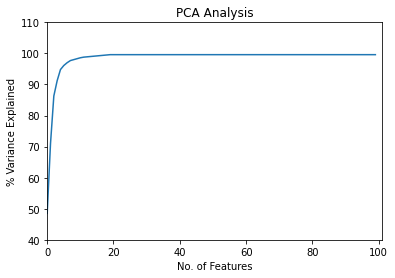

In [ ]:
# #Plot graph 

# plt.ylabel('% Variance Explained')
# plt.xlabel('No. of Features')
# plt.title('PCA Analysis')
# plt.ylim(40,110)
# plt.xlim(0,101)
# plt.plot(var)

In [ ]:
# NCOMPONENTS = 20

# pca = PCA(n_components=NCOMPONENTS)
# X_pca = pca.fit_transform(X)
# pca_std = np.std(X_pca)

# print(X_pca.shape)

(2406, 20)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape, X_test.shape)

(1924, 139) (482, 139)


In [ ]:
# Create function returning a compiled network
def create_network():
    
    # Start neural network
    network = models.Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation='relu', input_shape=(139,)))

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation='relu'))

    # Add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=1, activation='sigmoid'))

    # Compile neural network
    network.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', # Root Mean Square Propagation
                    metrics=['accuracy']) # Accuracy performance metric
    
    # Return compiled network
    return network

In [ ]:
# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasClassifier(build_fn=create_network, 
                                 epochs=10, 
                                 batch_size=20, 
                                 verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  """


In [ ]:
# Evaluate neural network using ten-fold cross-validation
results = cross_val_score(neural_network, X_train, y_train, cv=10)
print(results.mean())

0.996875


In [ ]:
# Create function returning a compiled network
def create_network(optimizer='rmsprop', init='glorot_uniform'):
    
    # Start neural network
    network = models.Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation='relu', input_shape=(139,)))

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation='relu'))
    network.add(layers.Dense(units=8, activation='relu'))
    network.add(layers.Dense(units=8, activation='relu'))

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=4, activation='relu'))

    # Add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=1, activation='sigmoid'))

    # Compile neural network
    network.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', # Root Mean Square Propagation
                    metrics=['accuracy']) # Accuracy performance metric
    
    # Return compiled network
    return network

In [ ]:
# create model
model = KerasClassifier(build_fn=create_network, verbose=0)
# grid search epochs, batch size and optimizer
optimizers = ['rmsprop', 'adam']
init = ['glorot_uniform', 'normal', 'uniform']
epochs = [10, 50, 100]
batches = [5, 10, 20]
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=init)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  


Best: 1.000000 using {'batch_size': 5, 'epochs': 10, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
1.000000 (0.000000) with: {'batch_size': 5, 'epochs': 10, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.998960 (0.001274) with: {'batch_size': 5, 'epochs': 10, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.999481 (0.001039) with: {'batch_size': 5, 'epochs': 10, 'init': 'normal', 'optimizer': 'rmsprop'}
0.900260 (0.122553) with: {'batch_size': 5, 'epochs': 10, 'init': 'normal', 'optimizer': 'adam'}
0.998439 (0.002083) with: {'batch_size': 5, 'epochs': 10, 'init': 'uniform', 'optimizer': 'rmsprop'}
0.998958 (0.002083) with: {'batch_size': 5, 'epochs': 10, 'init': 'uniform', 'optimizer': 'adam'}
1.000000 (0.000000) with: {'batch_size': 5, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.948571 (0.102857) with: {'batch_size': 5, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'adam'}
1.000000 (0.000000) with: {'batch_size': 5, 'epochs': 50, 'init': 'normal',

In [ ]:
# Create function returning a compiled network
def create_network(optimizer='adam', init='glorot_uniform'):
    
    # Start neural network
    network = models.Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation='relu', input_shape=(139,)))

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation='relu'))
    network.add(layers.Dense(units=8, activation='relu'))
    network.add(layers.Dense(units=8, activation='relu'))

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=4, activation='relu'))

    # Add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=1, activation='sigmoid'))

    # Compile neural network
    network.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', 
                    metrics=['accuracy']) # Accuracy performance metric
    
    # Return compiled network
    return network

In [ ]:
# create model
model = KerasClassifier(build_fn=create_network, verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  


In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=5)

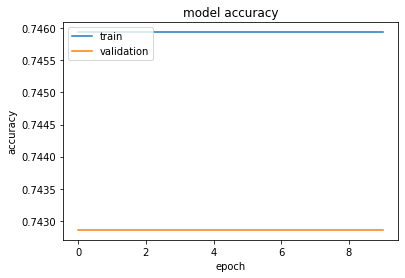

In [ ]:
# summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

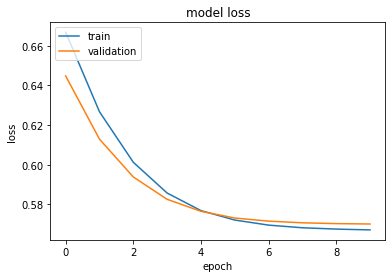

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
X_train.shape

(1924, 139)

Test the model

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
a = accuracy_score(y_pred,y_test)
print('Accuracy is:', a*100)

Accuracy is: 76.14107883817427


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       367
           1       1.00      1.00      1.00       115

    accuracy                           1.00       482
   macro avg       1.00      1.00      1.00       482
weighted avg       1.00      1.00      1.00       482



In [ ]:
df_maj = df[df.Label == 0]
df_min = df[df.Label == 1]

df_min_upd = resample(df_min, replace = 1, n_samples = 1801, random_state = 123)

df_upd = pd.concat([df_maj, df_min_upd])
df_upd.Label.value_counts()

1    1801
0    1801
Name: Label, dtype: int64

In [ ]:
X = df_upd.iloc[:,1:]
y = df_upd.iloc[:,140]
X = X.iloc[:,:139]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape, X_test.shape)

(2881, 139) (721, 139)


In [ ]:
# Create function returning a compiled network
def create_network():
    
    # Start neural network
    network = models.Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation='relu', input_shape=(139,)))

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation='relu'))

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=8, activation='relu'))

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=8, activation='relu'))

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=4, activation='relu'))

    # Add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=1, activation='sigmoid'))

    # Compile neural network
    network.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', # Root Mean Square Propagation
                    metrics=['accuracy']) # Accuracy performance metric
    
    # Return compiled network
    return network

In [ ]:
# Wrap Keras model so it can be used by scikit-learn
neural_network = KerasClassifier(build_fn=create_network, 
                                 epochs=10, 
                                 batch_size=20, 
                                 verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  """


In [ ]:
# Evaluate neural network using ten-fold cross-validation
results = cross_val_score(neural_network, X_train, y_train, cv=10)
print(results.mean())

0.9951388955116272


In [ ]:
# Create function returning a compiled network
def create_network(optimizer='rmsprop', init='glorot_uniform'):
    
    # Start neural network
    network = models.Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation='relu', input_shape=(139,)))

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation='relu'))
    network.add(layers.Dense(units=8, activation='relu'))
    network.add(layers.Dense(units=8, activation='relu'))

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=4, activation='relu'))

    # Add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=1, activation='sigmoid'))

    # Compile neural network
    network.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', # Root Mean Square Propagation
                    metrics=['accuracy']) # Accuracy performance metric
    
    # Return compiled network
    return network

In [ ]:
# create model
model = KerasClassifier(build_fn=create_network, verbose=0)
# grid search epochs, batch size and optimizer
optimizers = ['rmsprop', 'adam']
init = ['glorot_uniform', 'normal', 'uniform']
epochs = [10, 50, 100]
batches = [5, 10, 20]
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=init)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  


Best: 1.000000 using {'batch_size': 5, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.998264 (0.002690) with: {'batch_size': 5, 'epochs': 10, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.999306 (0.000851) with: {'batch_size': 5, 'epochs': 10, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.902778 (0.193578) with: {'batch_size': 5, 'epochs': 10, 'init': 'normal', 'optimizer': 'rmsprop'}
0.899480 (0.201040) with: {'batch_size': 5, 'epochs': 10, 'init': 'normal', 'optimizer': 'adam'}
0.998958 (0.002083) with: {'batch_size': 5, 'epochs': 10, 'init': 'uniform', 'optimizer': 'rmsprop'}
0.994446 (0.007795) with: {'batch_size': 5, 'epochs': 10, 'init': 'uniform', 'optimizer': 'adam'}
1.000000 (0.000000) with: {'batch_size': 5, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
1.000000 (0.000000) with: {'batch_size': 5, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.903125 (0.193750) with: {'batch_size': 5, 'epochs': 50, 'init': 'normal',

In [ ]:
# Create function returning a compiled network
def create_network(optimizer='adam', init='glorot_uniform'):
    
    # Start neural network
    network = models.Sequential()

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation='relu', input_shape=(139,)))

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=16, activation='relu'))
    network.add(layers.Dense(units=8, activation='relu'))
    network.add(layers.Dense(units=8, activation='relu'))

    # Add fully connected layer with a ReLU activation function
    network.add(layers.Dense(units=4, activation='relu'))

    # Add fully connected layer with a sigmoid activation function
    network.add(layers.Dense(units=1, activation='sigmoid'))

    # Compile neural network
    network.compile(loss='binary_crossentropy', # Cross-entropy
                    optimizer='rmsprop', 
                    metrics=['accuracy']) # Accuracy performance metric
    
    # Return compiled network
    return network

In [ ]:
# create model
model = KerasClassifier(build_fn=create_network, verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  


In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=5)

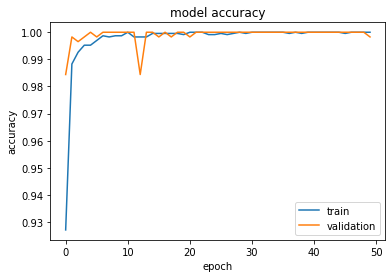

In [ ]:
# summarize history for loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

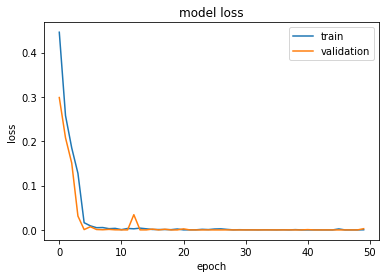

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
a = accuracy_score(y_pred,y_test)
print('Accuracy is:', a*100)

Accuracy is: 99.86130374479889


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       377
           1       1.00      1.00      1.00       344

    accuracy                           1.00       721
   macro avg       1.00      1.00      1.00       721
weighted avg       1.00      1.00      1.00       721

